In [149]:
import pandas as pd
from sklearn.model_selection import train_test_split
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score, recall_score, precision_recall_curve
from matplotlib import pyplot as plt
from sklearn.metrics import plot_precision_recall_curve
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn import svm

In [95]:
df = pd.read_csv("./data/labeled.csv", sep=",")

In [96]:
df["toxic"] = df["toxic"].apply(int)

In [97]:
df.head(10)

,comment,toxic
0,"Верблюдов-то за что? Дебилы, бл...\n",1
1,"Хохлы, это отдушина затюканого россиянина, мол...",1
2,Собаке - собачья смерть\n,1
3,"Страницу обнови, дебил. Это тоже не оскорблени...",1
4,"тебя не убедил 6-страничный пдф в том, что Скр...",1
5,Для каких стан является эталоном современная с...,1
6,В шапке были ссылки на инфу по текущему фильму...,0
7,УПАД Т! ТАМ НЕЛЬЗЯ СТРОИТЬ! ТЕХНОЛОГИЙ НЕТ! РА...,1
8,"Ебать тебя разносит, шизик.\n",1
9,"Обосрался, сиди обтекай\n",1


In [98]:
df["toxic"].value_counts()

0    9586
1    4826
Name: toxic, dtype: int64

In [99]:
train_df, test_df = train_test_split(df, test_size=500)

In [100]:
test_df["toxic"].value_counts()

0    347
1    153
Name: toxic, dtype: int64

In [101]:
train_df["toxic"].value_counts()

0    9239
1    4673
Name: toxic, dtype: int64

In [102]:
snowball = SnowballStemmer(language="russian")
russian_stop_words = stopwords.words("russian")

def tokenize_sentence(sentence: str, remove_stop_words: bool = True):
    tokens = word_tokenize(sentence, language="russian")
    tokens = [i for i in tokens if i not in string.punctuation]
    if remove_stop_words:
        tokens = [i for i in tokens if i not in russian_stop_words]
    tokens = [snowball.stem(i) for i in tokens]
    return tokens

# SVC

In [195]:
# choice best kernal
svm_grid_pipeline = Pipeline([
    ("vectorizer", TfidfVectorizer(tokenizer=lambda x: tokenize_sentence(x, remove_stop_words=True))),
    ("model", 
     GridSearchCV(
        svm.SVC(),
        param_grid={ "kernel" : ['linear', 'poly', 'rbf', 'sigmoid']},
        cv=3,
         verbose=4
        )
    )
])

In [196]:
svm_grid_pipeline.fit(train_df["comment"], train_df["toxic"])

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3] END .....................kernel=linear;, score=0.873 total time=   9.1s
[CV 2/3] END .....................kernel=linear;, score=0.869 total time=   9.2s
[CV 3/3] END .....................kernel=linear;, score=0.862 total time=   9.2s
[CV 1/3] END .......................kernel=poly;, score=0.678 total time=  27.1s
[CV 2/3] END .......................kernel=poly;, score=0.675 total time=  25.9s
[CV 3/3] END .......................kernel=poly;, score=0.674 total time=  26.5s
[CV 1/3] END ........................kernel=rbf;, score=0.850 total time=  20.0s
[CV 2/3] END ........................kernel=rbf;, score=0.849 total time=  18.1s
[CV 3/3] END ........................kernel=rbf;, score=0.844 total time=  20.1s
[CV 1/3] END ....................kernel=sigmoid;, score=0.872 total time=  10.8s
[CV 2/3] END ....................kernel=sigmoid;, score=0.868 total time=  10.1s
[CV 3/3] END ....................kernel=sigmoid;,

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function <lambda> at 0x3492FD60>)),
                ('model',
                 GridSearchCV(cv=3, estimator=SVC(),
                              param_grid={'kernel': ['linear', 'poly', 'rbf',
                                                     'sigmoid']},
                              verbose=4))])

In [168]:
svm_pipeline = Pipeline([
    ("vectorizer", TfidfVectorizer(tokenizer=lambda x: tokenize_sentence(x, remove_stop_words=True))),
    ("model", svm.SVC(kernel='linear', probability=True))
]
)

In [169]:
svm_pipeline.fit(train_df["comment"], train_df["toxic"])

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function <lambda> at 0x347E5B20>)),
                ('model', SVC(kernel='linear', probability=True))])

In [170]:
precision_score(y_true=test_df["toxic"], y_pred=svm_pipeline.predict(test_df["comment"]))

0.8805970149253731

In [171]:
recall_score(y_true=test_df["toxic"], y_pred=svm_pipeline.predict(test_df["comment"]))

0.7712418300653595

c:\users\arisha\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


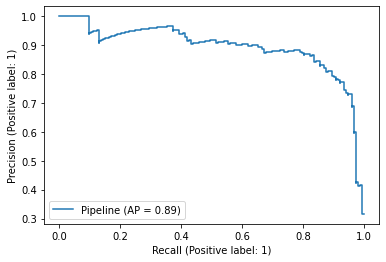

In [172]:
plot_precision_recall_curve(estimator=svm_pipeline, X=test_df["comment"], y=test_df["toxic"])

In [200]:
svm_prec, svm_rec, svm_thresholds = precision_recall_curve(
    y_true=test_df["toxic"],
    probas_pred=svm_pipeline.predict_proba(test_df["comment"])[:, 1])

In [174]:
np.where(svm_prec > 0.95)

(array([417, 418, 419, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430,
        431, 432, 433, 434, 435, 436, 437, 438, 439, 459, 465, 466, 467,
        468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480],
       dtype=int32),)

In [199]:
svm_thresholds[417]

0.9660923313926337

In [175]:
precision_score(y_true=test_df["toxic"], y_pred=svm_pipeline.predict_proba(test_df["comment"])[:, 1] > svm_thresholds[417])

0.9516129032258065

In [176]:
recall_score(y_true=test_df["toxic"], y_pred=svm_pipeline.predict_proba(test_df["comment"])[:, 1] > svm_thresholds[417])


0.38562091503267976

# Desition Trees

In [142]:
dtc_grid_pipeline = Pipeline([
    ("vectorizer", TfidfVectorizer(tokenizer=lambda x: tokenize_sentence(x, remove_stop_words=True))),
    ("model", 
     GridSearchCV(
        DecisionTreeClassifier(),
        param_grid={'criterion': ["gini", "entropy"], 'max_depth':[25, 50, 75, 100, 200], 'min_samples_split': [2, 5, 10]},
        cv=3,
         verbose=4
        )
    )
])

In [143]:
dtc_grid_pipeline.fit(train_df["comment"], train_df["toxic"])

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV 1/3] END criterion=gini, max_depth=25, min_samples_split=2;, score=0.752 total time=   0.6s
[CV 2/3] END criterion=gini, max_depth=25, min_samples_split=2;, score=0.740 total time=   0.6s
[CV 3/3] END criterion=gini, max_depth=25, min_samples_split=2;, score=0.752 total time=   0.6s
[CV 1/3] END criterion=gini, max_depth=25, min_samples_split=5;, score=0.752 total time=   0.6s
[CV 2/3] END criterion=gini, max_depth=25, min_samples_split=5;, score=0.739 total time=   0.6s
[CV 3/3] END criterion=gini, max_depth=25, min_samples_split=5;, score=0.751 total time=   0.6s
[CV 1/3] END criterion=gini, max_depth=25, min_samples_split=10;, score=0.751 total time=   0.6s
[CV 2/3] END criterion=gini, max_depth=25, min_samples_split=10;, score=0.741 total time=   0.6s
[CV 3/3] END criterion=gini, max_depth=25, min_samples_split=10;, score=0.751 total time=   0.6s
[CV 1/3] END criterion=gini, max_depth=50, min_samples_split=2;, score=0

[CV 3/3] END criterion=entropy, max_depth=200, min_samples_split=2;, score=0.768 total time=   2.8s
[CV 1/3] END criterion=entropy, max_depth=200, min_samples_split=5;, score=0.773 total time=   3.1s
[CV 2/3] END criterion=entropy, max_depth=200, min_samples_split=5;, score=0.752 total time=   2.7s
[CV 3/3] END criterion=entropy, max_depth=200, min_samples_split=5;, score=0.763 total time=   2.6s
[CV 1/3] END criterion=entropy, max_depth=200, min_samples_split=10;, score=0.771 total time=   2.3s
[CV 2/3] END criterion=entropy, max_depth=200, min_samples_split=10;, score=0.763 total time=   2.4s
[CV 3/3] END criterion=entropy, max_depth=200, min_samples_split=10;, score=0.762 total time=   2.5s


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function <lambda> at 0x237E4610>)),
                ('model',
                 GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [25, 50, 75, 100, 200],
                                          'min_samples_split': [2, 5, 10]},
                              verbose=4))])

In [177]:
dtc_pipeline = Pipeline([
    ("vectorizer", TfidfVectorizer(tokenizer=lambda x: tokenize_sentence(x, remove_stop_words=True))),
    ("model", DecisionTreeClassifier(criterion="gini", max_depth=200, min_samples_split=2))
]
)

In [178]:
dtc_pipeline.fit(train_df["comment"], train_df["toxic"])

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function <lambda> at 0x34EE8DA8>)),
                ('model', DecisionTreeClassifier(max_depth=200))])

In [179]:
precision_score(y_true=test_df["toxic"], y_pred=dtc_pipeline.predict(test_df["comment"]))

0.711864406779661

In [180]:
recall_score(y_true=test_df["toxic"], y_pred=dtc_pipeline.predict(test_df["comment"]))

0.5490196078431373

c:\users\arisha\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


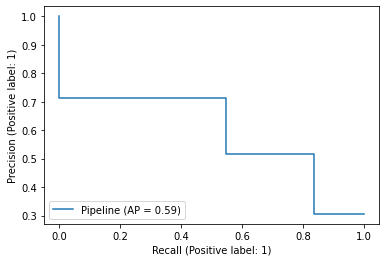

In [181]:
plot_precision_recall_curve(estimator=dtc_pipeline, X=test_df["comment"], y=test_df["toxic"])

# Bonus Logistic Regression

In [182]:
lr_grid_pipeline = Pipeline([
    ("vectorizer", TfidfVectorizer(tokenizer=lambda x: tokenize_sentence(x, remove_stop_words=True))),
    ("model", 
     GridSearchCV(
        LogisticRegression(random_state=0, max_iter=1000),
        param_grid={'C': [0.1, 1., 5.]},
        cv=3,
         verbose=4
        )
    )
])

In [183]:
lr_grid_pipeline.fit(train_df["comment"], train_df["toxic"])

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3] END .............................C=0.1;, score=0.686 total time=   0.1s
[CV 2/3] END .............................C=0.1;, score=0.684 total time=   0.1s
[CV 3/3] END .............................C=0.1;, score=0.687 total time=   0.1s
[CV 1/3] END .............................C=1.0;, score=0.842 total time=   0.3s
[CV 2/3] END .............................C=1.0;, score=0.836 total time=   0.2s
[CV 3/3] END .............................C=1.0;, score=0.837 total time=   0.2s
[CV 1/3] END .............................C=5.0;, score=0.869 total time=   0.7s
[CV 2/3] END .............................C=5.0;, score=0.862 total time=   0.5s
[CV 3/3] END .............................C=5.0;, score=0.857 total time=   0.5s


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function <lambda> at 0x35263580>)),
                ('model',
                 GridSearchCV(cv=3,
                              estimator=LogisticRegression(max_iter=1000,
                                                           random_state=0),
                              param_grid={'C': [0.1, 1.0, 5.0]}, verbose=4))])

In [184]:
lr_pipeline = Pipeline([
    ("vectorizer", TfidfVectorizer(tokenizer=lambda x: tokenize_sentence(x, remove_stop_words=True))),
    ("model", LogisticRegression(random_state=0, C=5., max_iter=1000))
]
)

In [185]:
lr_pipeline.fit(train_df["comment"], train_df["toxic"])

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function <lambda> at 0x3691AA00>)),
                ('model',
                 LogisticRegression(C=5.0, max_iter=1000, random_state=0))])

In [186]:
precision_score(y_true=test_df["toxic"], y_pred=lr_pipeline.predict(test_df["comment"]))

0.8740740740740741

In [187]:
recall_score(y_true=test_df["toxic"], y_pred=lr_pipeline.predict(test_df["comment"]))

0.7712418300653595

c:\users\arisha\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


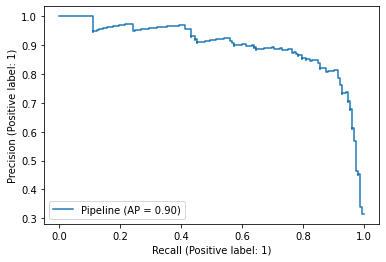

In [188]:
plot_precision_recall_curve(estimator=lr_pipeline, X=test_df["comment"], y=test_df["toxic"])

In [189]:
lr_prec, lr_rec, lr_thresholds = precision_recall_curve(
    y_true=test_df["toxic"],
    probas_pred=lr_pipeline.predict_proba(test_df["comment"])[:, 1])

In [190]:
np.where(lr_prec > 0.95)

(array([414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426,
        427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439,
        440, 441, 442, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454,
        455, 456, 457, 458, 459, 460, 461, 462, 466, 467, 468, 469, 470,
        471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483],
       dtype=int32),)

In [191]:
lr_thresholds[414]

0.8360862216783078

In [192]:
precision_score(y_true=test_df["toxic"], y_pred=lr_pipeline.predict_proba(test_df["comment"])[:, 1] > lr_thresholds[414])

0.9558823529411765

In [193]:
recall_score(y_true=test_df["toxic"], y_pred=lr_pipeline.predict_proba(test_df["comment"])[:, 1] > lr_thresholds[414])


0.42483660130718953